In [1]:
using Plots
using StatsBase
using LinearAlgebra
using Statistics
using JLD2
using Dates
using LsqFit
using StaticArrays
using JSON

# data structure module (needs to be module to avoid overwriting local variables in REPL scope)
include("SpinSimParams.jl")
using .SpinSimParams

# function libraries
include("spin_sims.jl");

# for analysis of M(t)
include("MTools.jl")
using .MTools

# Set Independent Variables

In [5]:
# interaction
α = collect(LinRange(0.1, 0.2, 15));
ω = 0;
τ = collect(LinRange(10e-6, 200e-6, 15));

# flip operators
Ix = @SMatrix [0 1/2; 1/2 0];
f = LinRange(0, 1, 10);
UL90 = ();
UR90 = ();
for idx = 1:10
    UL90 = (UL90..., exp(-1im*pi*f[idx]*Ix/2));
    UR90 = (UR90..., exp(1im*pi*f[idx]*Ix/2));
end

# number of frequencies
nx = 10;
ny = 10;
nz = 1;
n = (nx, ny, nz);
nfreq = prod(n);

# make the parameter file
params = make_params(α, ω, n);
    
params["UL90"] = UL90;
params["UR90"] = UR90;
params["dt"] = 2;
params["τ"] = τ;
params["f"] = f;

# Set Options
1. "integrated_sampling": if true, use integrated sampling; if false, use discrete sampling (default = false).
2. "tiles": if true, use tile approach to generating lattice (default = false).  Must provide **params["r_tiles"] and params["tile_norm"]**.  "r_tiles" specifies the positions of the tiles, and "tile_norm" is a rescaling parameter to make sure the tiles do not overlap.
3. "local_M_on": if true, implement correlation length (default = false).  Must provide **params["M_stencil"]**.
4. $\theta$ is defined as follows: $\theta$[1] is the angle between hlk[1] and hlk[2], $\theta$[2] is the angle between hlk[1] and the projection of hlk[3] into the plan of hlk[1] and hlk[2], and $\theta$[3] is the angle between hlk[3] and the axis perpendicular to the plan created by hlk[1] and hlk[2] (ie if hlk[1] and hlk[2] are considered in the x-y plane, $\theta$[3] is the angle from the z axis to hlk[3])

In [6]:
# set the variables to loop over
params["integrated_sampling"] = true;
vars = ["α", "τ", ("UL90", "UR90")];
params["vars"] = vars;

In [4]:
idx_list, d = make_idx(vars, params)
M_list = Array{Any}(undef, d)

for i in idx_list["α", "τ", ("UL90", "UR90")];

    # generate temporary parameters
    tparams = make_temp_params(params, vars, i)

    # simulate
    @time M_list[i] = spin_echo_sim(tparams)

end

params["M_list"] = M_list;

using JSON
fname = "004_test.json"
open(fname,"w") do f
    JSON.print(f, params)
end

  1.115187 seconds (4.08 M allocations: 209.077 MiB, 5.13% gc time)
  0.019898 seconds (322.81 k allocations: 20.404 MiB, 45.42% gc time)
  0.011759 seconds (322.81 k allocations: 20.404 MiB)
  0.020576 seconds (322.81 k allocations: 20.404 MiB, 40.34% gc time)
  0.011471 seconds (322.81 k allocations: 20.404 MiB)
  0.021134 seconds (322.81 k allocations: 20.404 MiB, 39.84% gc time)
  0.011541 seconds (322.81 k allocations: 20.404 MiB)
  0.019329 seconds (322.81 k allocations: 20.404 MiB, 34.05% gc time)
  0.011619 seconds (322.81 k allocations: 20.404 MiB)
  0.018720 seconds (322.81 k allocations: 20.404 MiB, 33.58% gc time)
  0.010925 seconds (322.81 k allocations: 20.404 MiB)
  0.018476 seconds (322.81 k allocations: 20.404 MiB, 33.96% gc time)
  0.011842 seconds (322.81 k allocations: 20.404 MiB)
  0.012137 seconds (322.81 k allocations: 20.404 MiB)
  0.017740 seconds (322.81 k allocations: 20.404 MiB, 35.13% gc time)
  0.033934 seconds (769.41 k allocations: 48.605 MiB, 18.15% gc 

  0.174304 seconds (3.87 M allocations: 244.715 MiB, 23.10% gc time)
  0.165070 seconds (3.87 M allocations: 244.715 MiB, 19.23% gc time)
  0.172872 seconds (3.87 M allocations: 244.715 MiB, 22.13% gc time)
  0.170343 seconds (3.87 M allocations: 244.715 MiB, 19.12% gc time)
  0.171756 seconds (3.87 M allocations: 244.715 MiB, 22.43% gc time)
  0.173136 seconds (3.87 M allocations: 244.715 MiB, 22.57% gc time)
  0.168666 seconds (3.87 M allocations: 244.715 MiB, 19.57% gc time)
  0.173743 seconds (3.87 M allocations: 244.715 MiB, 21.73% gc time)
  0.165811 seconds (3.87 M allocations: 244.715 MiB, 19.33% gc time)
  0.170117 seconds (3.87 M allocations: 244.715 MiB, 22.60% gc time)
  0.175468 seconds (3.87 M allocations: 244.715 MiB, 22.44% gc time)
  0.172031 seconds (3.87 M allocations: 244.715 MiB, 21.33% gc time)
  0.173668 seconds (3.87 M allocations: 244.715 MiB, 21.96% gc time)
  0.163631 seconds (3.87 M allocations: 244.715 MiB, 19.02% gc time)
  0.172058 seconds (3.87 M allocat

  0.032968 seconds (769.41 k allocations: 48.605 MiB, 19.73% gc time)
  0.032536 seconds (769.41 k allocations: 48.605 MiB, 19.39% gc time)
  0.034422 seconds (769.41 k allocations: 48.605 MiB, 22.23% gc time)
  0.032984 seconds (769.41 k allocations: 48.605 MiB, 19.81% gc time)
  0.039671 seconds (769.41 k allocations: 48.605 MiB, 32.94% gc time)
  0.035364 seconds (769.41 k allocations: 48.605 MiB, 20.79% gc time)
  0.033506 seconds (769.41 k allocations: 48.605 MiB, 19.75% gc time)
  0.034959 seconds (769.41 k allocations: 48.605 MiB, 20.09% gc time)
  0.034489 seconds (769.41 k allocations: 48.605 MiB, 21.19% gc time)
  0.033260 seconds (769.41 k allocations: 48.605 MiB, 19.25% gc time)
  0.033210 seconds (769.41 k allocations: 48.605 MiB, 19.99% gc time)
  0.033432 seconds (769.41 k allocations: 48.605 MiB, 20.13% gc time)
  0.033423 seconds (769.41 k allocations: 48.605 MiB, 19.26% gc time)
  0.047402 seconds (769.41 k allocations: 48.605 MiB, 26.27% gc time)
  0.035378 seconds (

  0.162427 seconds (3.87 M allocations: 244.715 MiB, 20.11% gc time)
  0.183258 seconds (4.31 M allocations: 272.258 MiB, 21.33% gc time)
  0.189772 seconds (4.31 M allocations: 272.258 MiB, 23.90% gc time)
  0.181833 seconds (4.31 M allocations: 272.258 MiB, 20.76% gc time)
  0.185933 seconds (4.31 M allocations: 272.258 MiB, 21.35% gc time)
  0.183171 seconds (4.31 M allocations: 272.258 MiB, 21.48% gc time)
  0.185020 seconds (4.31 M allocations: 272.258 MiB, 21.38% gc time)
  0.189586 seconds (4.31 M allocations: 272.258 MiB, 24.45% gc time)
  0.181004 seconds (4.31 M allocations: 272.258 MiB, 21.06% gc time)
  0.182187 seconds (4.31 M allocations: 272.258 MiB, 21.73% gc time)
  0.183041 seconds (4.31 M allocations: 272.258 MiB, 21.20% gc time)
  0.245770 seconds (4.31 M allocations: 272.258 MiB, 18.89% gc time)
  0.184938 seconds (4.31 M allocations: 272.258 MiB, 21.46% gc time)
  0.185758 seconds (4.31 M allocations: 272.258 MiB, 21.64% gc time)
  0.181991 seconds (4.31 M allocat

  0.072535 seconds (1.22 M allocations: 76.808 MiB, 19.12% gc time)
  0.049994 seconds (1.22 M allocations: 76.808 MiB, 14.25% gc time)
  0.057841 seconds (1.22 M allocations: 76.808 MiB, 26.20% gc time)
  0.062563 seconds (1.22 M allocations: 76.808 MiB, 25.05% gc time)
  0.047727 seconds (1.22 M allocations: 76.808 MiB, 14.19% gc time)
  0.075128 seconds (1.22 M allocations: 76.808 MiB, 20.03% gc time)
  0.067168 seconds (1.22 M allocations: 76.808 MiB, 22.61% gc time)
  0.049144 seconds (1.22 M allocations: 76.808 MiB, 14.41% gc time)
  0.055824 seconds (1.22 M allocations: 76.808 MiB, 24.14% gc time)
  0.049230 seconds (1.22 M allocations: 76.808 MiB, 13.67% gc time)
  0.053747 seconds (1.22 M allocations: 76.808 MiB, 25.01% gc time)
  0.056978 seconds (1.22 M allocations: 76.808 MiB, 25.10% gc time)
  0.046792 seconds (1.22 M allocations: 76.808 MiB, 14.65% gc time)
  0.056777 seconds (1.22 M allocations: 76.808 MiB, 26.43% gc time)
  0.070664 seconds (1.65 M allocations: 104.352 

  0.220384 seconds (4.31 M allocations: 272.258 MiB, 26.12% gc time)
  0.241713 seconds (4.76 M allocations: 300.457 MiB, 18.62% gc time)
  0.209429 seconds (4.76 M allocations: 300.457 MiB, 21.66% gc time)
  0.213698 seconds (4.76 M allocations: 300.457 MiB, 21.33% gc time)
  0.206088 seconds (4.76 M allocations: 300.457 MiB, 20.98% gc time)
  0.210619 seconds (4.76 M allocations: 300.457 MiB, 21.88% gc time)
  0.209750 seconds (4.76 M allocations: 300.457 MiB, 21.96% gc time)
  0.206922 seconds (4.76 M allocations: 300.457 MiB, 21.29% gc time)
  0.211200 seconds (4.76 M allocations: 300.457 MiB, 22.10% gc time)
  0.214900 seconds (4.76 M allocations: 300.457 MiB, 21.82% gc time)
  0.204838 seconds (4.76 M allocations: 300.457 MiB, 21.19% gc time)
  0.207334 seconds (4.76 M allocations: 300.457 MiB, 21.38% gc time)
  0.206169 seconds (4.76 M allocations: 300.457 MiB, 20.83% gc time)
  0.292770 seconds (4.76 M allocations: 300.457 MiB, 20.46% gc time)
  0.222712 seconds (4.76 M allocat

  0.070159 seconds (1.65 M allocations: 104.352 MiB, 12.34% gc time)
  0.076726 seconds (1.65 M allocations: 104.352 MiB, 24.13% gc time)
  0.084882 seconds (1.65 M allocations: 104.352 MiB, 23.29% gc time)
  0.083257 seconds (1.65 M allocations: 104.352 MiB, 21.15% gc time)
  0.085961 seconds (1.65 M allocations: 104.352 MiB, 23.58% gc time)
  0.097290 seconds (1.65 M allocations: 104.352 MiB, 24.30% gc time)
  0.102059 seconds (1.65 M allocations: 104.352 MiB, 26.08% gc time)
  0.113502 seconds (1.65 M allocations: 104.352 MiB, 28.06% gc time)
  0.087013 seconds (1.65 M allocations: 104.352 MiB, 24.16% gc time)
  0.081663 seconds (1.65 M allocations: 104.352 MiB, 23.49% gc time)
  0.093334 seconds (1.65 M allocations: 104.352 MiB, 21.42% gc time)
  0.085055 seconds (1.65 M allocations: 104.352 MiB, 22.50% gc time)
  0.080528 seconds (1.65 M allocations: 104.352 MiB, 21.77% gc time)
  0.103528 seconds (1.65 M allocations: 104.352 MiB, 27.45% gc time)
  0.078759 seconds (1.65 M allocat

  0.202938 seconds (4.76 M allocations: 300.457 MiB, 22.42% gc time)
  0.204445 seconds (4.76 M allocations: 300.457 MiB, 20.02% gc time)
  0.260086 seconds (5.19 M allocations: 328.000 MiB, 20.98% gc time)
  0.345665 seconds (5.19 M allocations: 328.000 MiB, 18.74% gc time)
  0.359775 seconds (5.19 M allocations: 328.000 MiB, 21.69% gc time)
  0.496124 seconds (5.19 M allocations: 328.000 MiB, 22.03% gc time)
  0.391805 seconds (5.19 M allocations: 328.000 MiB, 16.31% gc time)
  0.270824 seconds (5.19 M allocations: 328.000 MiB, 23.42% gc time)
  0.310058 seconds (5.19 M allocations: 328.000 MiB, 22.34% gc time)
  0.261712 seconds (5.19 M allocations: 328.000 MiB, 20.82% gc time)
  0.287367 seconds (5.19 M allocations: 328.000 MiB, 17.62% gc time)
  0.241054 seconds (5.19 M allocations: 328.000 MiB, 22.85% gc time)
  0.225416 seconds (5.19 M allocations: 328.000 MiB, 21.62% gc time)
  0.209976 seconds (5.19 M allocations: 328.000 MiB, 17.94% gc time)
  0.292131 seconds (5.19 M allocat

  0.068471 seconds (1.65 M allocations: 104.352 MiB, 19.90% gc time)
  0.064148 seconds (1.65 M allocations: 104.352 MiB, 20.49% gc time)
  0.096064 seconds (2.10 M allocations: 132.559 MiB, 23.41% gc time)
  0.087378 seconds (2.10 M allocations: 132.559 MiB, 23.87% gc time)
  0.080349 seconds (2.10 M allocations: 132.559 MiB, 17.00% gc time)
  0.136085 seconds (2.10 M allocations: 132.559 MiB, 15.65% gc time)
  0.093441 seconds (2.10 M allocations: 132.559 MiB, 24.42% gc time)
  0.089645 seconds (2.10 M allocations: 132.559 MiB, 15.75% gc time)
  0.089001 seconds (2.10 M allocations: 132.559 MiB, 23.50% gc time)
  0.078378 seconds (2.10 M allocations: 132.559 MiB, 17.31% gc time)
  0.089936 seconds (2.10 M allocations: 132.559 MiB, 24.92% gc time)
  0.091452 seconds (2.10 M allocations: 132.559 MiB, 24.81% gc time)
  0.080454 seconds (2.10 M allocations: 132.559 MiB, 17.38% gc time)
  0.087682 seconds (2.10 M allocations: 132.559 MiB, 23.20% gc time)
  0.086754 seconds (2.10 M allocat

  0.200682 seconds (5.19 M allocations: 328.000 MiB, 19.29% gc time)
  0.211475 seconds (5.19 M allocations: 328.000 MiB, 21.04% gc time)
  0.271044 seconds (5.19 M allocations: 328.000 MiB, 15.53% gc time)
  0.232186 seconds (5.64 M allocations: 356.199 MiB, 21.48% gc time)
  0.231175 seconds (5.64 M allocations: 356.199 MiB, 21.67% gc time)
  0.219820 seconds (5.64 M allocations: 356.199 MiB, 18.75% gc time)
  0.230105 seconds (5.64 M allocations: 356.199 MiB, 21.28% gc time)
  0.223542 seconds (5.64 M allocations: 356.199 MiB, 19.00% gc time)
  0.225610 seconds (5.64 M allocations: 356.199 MiB, 20.78% gc time)
  0.217518 seconds (5.64 M allocations: 356.199 MiB, 17.77% gc time)
  0.320248 seconds (5.64 M allocations: 356.199 MiB, 14.45% gc time)
  0.249689 seconds (5.64 M allocations: 356.199 MiB, 16.38% gc time)
  0.325299 seconds (5.64 M allocations: 356.199 MiB, 14.05% gc time)
  0.320815 seconds (5.64 M allocations: 356.199 MiB, 13.86% gc time)
  0.211047 seconds (5.64 M allocat

  0.102017 seconds (2.55 M allocations: 160.758 MiB, 20.18% gc time)
  0.100840 seconds (2.55 M allocations: 160.758 MiB, 20.74% gc time)
  0.101346 seconds (2.55 M allocations: 160.758 MiB, 20.07% gc time)
  0.091881 seconds (2.55 M allocations: 160.758 MiB, 14.52% gc time)
  0.099027 seconds (2.55 M allocations: 160.758 MiB, 19.82% gc time)
  0.099682 seconds (2.55 M allocations: 160.758 MiB, 20.02% gc time)
  0.100817 seconds (2.55 M allocations: 160.758 MiB, 20.26% gc time)
  0.102289 seconds (2.55 M allocations: 160.758 MiB, 19.92% gc time)
  0.092881 seconds (2.55 M allocations: 160.758 MiB, 13.99% gc time)
  0.098058 seconds (2.55 M allocations: 160.758 MiB, 19.96% gc time)
  0.103537 seconds (2.55 M allocations: 160.758 MiB, 20.36% gc time)
  0.100570 seconds (2.55 M allocations: 160.758 MiB, 20.39% gc time)
  0.103297 seconds (2.55 M allocations: 160.758 MiB, 19.63% gc time)
  0.098083 seconds (2.55 M allocations: 160.758 MiB, 19.97% gc time)
  0.098051 seconds (2.55 M allocat

  0.221560 seconds (5.64 M allocations: 356.199 MiB, 19.23% gc time)
  0.225129 seconds (5.64 M allocations: 356.199 MiB, 19.16% gc time)
  0.280578 seconds (6.09 M allocations: 384.398 MiB, 21.60% gc time)
  0.241469 seconds (6.09 M allocations: 384.398 MiB, 20.30% gc time)
  0.230808 seconds (6.09 M allocations: 384.398 MiB, 18.34% gc time)
  0.233579 seconds (6.09 M allocations: 384.398 MiB, 17.73% gc time)
  0.232604 seconds (6.09 M allocations: 384.398 MiB, 17.67% gc time)
  0.236100 seconds (6.09 M allocations: 384.398 MiB, 20.43% gc time)
  0.229145 seconds (6.09 M allocations: 384.398 MiB, 18.38% gc time)
  0.274318 seconds (6.09 M allocations: 384.398 MiB, 17.49% gc time)
  0.270991 seconds (6.09 M allocations: 384.398 MiB, 19.30% gc time)
  0.240510 seconds (6.09 M allocations: 384.398 MiB, 20.76% gc time)
  0.230628 seconds (6.09 M allocations: 384.398 MiB, 18.07% gc time)
  0.227998 seconds (6.09 M allocations: 384.398 MiB, 18.24% gc time)
  0.230742 seconds (6.09 M allocat

  0.130636 seconds (2.98 M allocations: 188.301 MiB, 18.06% gc time)
  0.127782 seconds (2.98 M allocations: 188.301 MiB, 22.48% gc time)
  0.122697 seconds (2.98 M allocations: 188.301 MiB, 19.14% gc time)
  0.130157 seconds (2.98 M allocations: 188.301 MiB, 17.63% gc time)
  0.122078 seconds (2.98 M allocations: 188.301 MiB, 18.18% gc time)
  0.113344 seconds (2.98 M allocations: 188.301 MiB, 18.84% gc time)
  0.120911 seconds (2.98 M allocations: 188.301 MiB, 20.17% gc time)
  0.122117 seconds (2.98 M allocations: 188.301 MiB, 18.15% gc time)
  0.117087 seconds (2.98 M allocations: 188.301 MiB, 19.38% gc time)
  0.115801 seconds (2.98 M allocations: 188.301 MiB, 18.62% gc time)
  0.116466 seconds (2.98 M allocations: 188.301 MiB, 19.57% gc time)
  0.114789 seconds (2.98 M allocations: 188.301 MiB, 18.72% gc time)
  0.119159 seconds (2.98 M allocations: 188.301 MiB, 18.48% gc time)
  0.128567 seconds (2.98 M allocations: 188.301 MiB, 17.87% gc time)
  0.114808 seconds (2.98 M allocat

  0.229035 seconds (6.09 M allocations: 384.398 MiB, 16.33% gc time)
  0.236044 seconds (6.09 M allocations: 384.398 MiB, 19.76% gc time)
  0.256724 seconds (6.52 M allocations: 411.942 MiB, 19.43% gc time)
  0.255984 seconds (6.52 M allocations: 411.942 MiB, 18.92% gc time)
  0.260148 seconds (6.52 M allocations: 411.942 MiB, 20.49% gc time)
  0.256512 seconds (6.52 M allocations: 411.942 MiB, 19.09% gc time)
  0.255836 seconds (6.52 M allocations: 411.942 MiB, 19.99% gc time)
  0.261150 seconds (6.52 M allocations: 411.942 MiB, 19.95% gc time)
  0.272217 seconds (6.52 M allocations: 411.942 MiB, 16.64% gc time)
  0.250700 seconds (6.52 M allocations: 411.942 MiB, 18.56% gc time)
  0.255056 seconds (6.52 M allocations: 411.942 MiB, 18.44% gc time)
  0.253338 seconds (6.52 M allocations: 411.942 MiB, 18.40% gc time)
  0.301190 seconds (6.52 M allocations: 411.942 MiB, 17.53% gc time)
  0.268931 seconds (6.52 M allocations: 411.942 MiB, 19.31% gc time)
  0.256609 seconds (6.52 M allocat

  0.132025 seconds (3.43 M allocations: 216.500 MiB, 17.77% gc time)
  0.132202 seconds (3.43 M allocations: 216.500 MiB, 18.25% gc time)
  0.132914 seconds (3.43 M allocations: 216.500 MiB, 17.50% gc time)
  0.155643 seconds (3.43 M allocations: 216.500 MiB, 22.23% gc time)
  0.128704 seconds (3.43 M allocations: 216.500 MiB, 17.86% gc time)
  0.136472 seconds (3.43 M allocations: 216.500 MiB, 18.23% gc time)
  0.138820 seconds (3.43 M allocations: 216.500 MiB, 20.37% gc time)
  0.137756 seconds (3.43 M allocations: 216.500 MiB, 18.81% gc time)
  0.142399 seconds (3.43 M allocations: 216.500 MiB, 16.34% gc time)
  0.142078 seconds (3.43 M allocations: 216.500 MiB, 17.07% gc time)
  0.139627 seconds (3.43 M allocations: 216.500 MiB, 18.20% gc time)
  0.133631 seconds (3.43 M allocations: 216.500 MiB, 17.79% gc time)
  0.131045 seconds (3.43 M allocations: 216.500 MiB, 17.93% gc time)
  0.129610 seconds (3.43 M allocations: 216.500 MiB, 18.19% gc time)
  0.138268 seconds (3.43 M allocat

  0.253671 seconds (6.52 M allocations: 411.942 MiB, 19.61% gc time)
  0.244877 seconds (6.52 M allocations: 411.942 MiB, 17.30% gc time)
  0.011247 seconds (322.81 k allocations: 20.404 MiB)
  0.018356 seconds (322.81 k allocations: 20.404 MiB, 43.91% gc time)
  0.012061 seconds (322.81 k allocations: 20.404 MiB)
  0.011694 seconds (322.81 k allocations: 20.404 MiB)
  0.010072 seconds (322.81 k allocations: 20.404 MiB)
  0.019613 seconds (322.81 k allocations: 20.404 MiB, 43.88% gc time)
  0.011382 seconds (322.81 k allocations: 20.404 MiB)
  0.011417 seconds (322.81 k allocations: 20.404 MiB)
  0.020022 seconds (322.81 k allocations: 20.404 MiB, 41.60% gc time)
  0.011456 seconds (322.81 k allocations: 20.404 MiB)
  0.011849 seconds (322.81 k allocations: 20.404 MiB)
  0.011502 seconds (322.81 k allocations: 20.404 MiB)
  0.019519 seconds (322.81 k allocations: 20.404 MiB, 41.26% gc time)
  0.011977 seconds (322.81 k allocations: 20.404 MiB)
  0.011357 seconds (322.81 k allocations: 

  0.161572 seconds (3.87 M allocations: 244.715 MiB, 23.50% gc time)
  0.149238 seconds (3.87 M allocations: 244.715 MiB, 17.27% gc time)
  0.146784 seconds (3.87 M allocations: 244.715 MiB, 17.57% gc time)
  0.147194 seconds (3.87 M allocations: 244.715 MiB, 18.12% gc time)
  0.148932 seconds (3.87 M allocations: 244.715 MiB, 18.25% gc time)
  0.159196 seconds (3.87 M allocations: 244.715 MiB, 21.53% gc time)
  0.145009 seconds (3.87 M allocations: 244.715 MiB, 17.11% gc time)
  0.147552 seconds (3.87 M allocations: 244.715 MiB, 17.21% gc time)
  0.145983 seconds (3.87 M allocations: 244.715 MiB, 17.12% gc time)
  0.147790 seconds (3.87 M allocations: 244.715 MiB, 17.76% gc time)
  0.155282 seconds (3.87 M allocations: 244.715 MiB, 22.18% gc time)
  0.150027 seconds (3.87 M allocations: 244.715 MiB, 17.37% gc time)
  0.160641 seconds (3.87 M allocations: 244.715 MiB, 18.02% gc time)
  0.147393 seconds (3.87 M allocations: 244.715 MiB, 16.88% gc time)
  0.172533 seconds (4.31 M allocat

  0.036604 seconds (769.41 k allocations: 48.605 MiB, 23.92% gc time)
  0.026107 seconds (769.41 k allocations: 48.605 MiB)
  0.036906 seconds (769.41 k allocations: 48.605 MiB, 23.35% gc time)
  0.025535 seconds (769.41 k allocations: 48.605 MiB)
  0.034778 seconds (769.41 k allocations: 48.605 MiB, 24.83% gc time)
  0.033354 seconds (769.41 k allocations: 48.605 MiB, 27.32% gc time)
  0.024849 seconds (769.41 k allocations: 48.605 MiB)
  0.036181 seconds (769.41 k allocations: 48.605 MiB, 25.28% gc time)
  0.027795 seconds (769.41 k allocations: 48.605 MiB)
  0.033548 seconds (769.41 k allocations: 48.605 MiB, 25.37% gc time)
  0.036674 seconds (769.41 k allocations: 48.605 MiB, 24.15% gc time)
  0.027027 seconds (769.41 k allocations: 48.605 MiB)
  0.033124 seconds (769.41 k allocations: 48.605 MiB, 26.95% gc time)
  0.047282 seconds (1.22 M allocations: 76.808 MiB, 18.15% gc time)
  0.049057 seconds (1.22 M allocations: 76.808 MiB, 19.44% gc time)
  0.049778 seconds (1.22 M allocat

  0.162757 seconds (4.31 M allocations: 272.258 MiB, 16.67% gc time)
  0.176760 seconds (4.31 M allocations: 272.258 MiB, 19.89% gc time)
  0.159355 seconds (4.31 M allocations: 272.258 MiB, 16.56% gc time)
  0.159139 seconds (4.31 M allocations: 272.258 MiB, 16.73% gc time)
  0.161379 seconds (4.31 M allocations: 272.258 MiB, 16.78% gc time)
  0.168315 seconds (4.31 M allocations: 272.258 MiB, 21.14% gc time)
  0.160486 seconds (4.31 M allocations: 272.258 MiB, 16.62% gc time)
  0.159832 seconds (4.31 M allocations: 272.258 MiB, 16.28% gc time)
  0.167559 seconds (4.31 M allocations: 272.258 MiB, 20.84% gc time)
  0.159556 seconds (4.31 M allocations: 272.258 MiB, 16.27% gc time)
  0.160289 seconds (4.31 M allocations: 272.258 MiB, 16.22% gc time)
  0.158148 seconds (4.31 M allocations: 272.258 MiB, 16.42% gc time)
  0.186131 seconds (4.76 M allocations: 300.457 MiB, 19.34% gc time)
  0.184227 seconds (4.76 M allocations: 300.457 MiB, 19.02% gc time)
  0.171976 seconds (4.76 M allocat

# Make MStats Plot (Single Variable)

In [2]:
# load the data
fname = "004_test.json"
dat = Dict()
open(fname, "r") do f
    global dat
    dat=JSON.parse(f);  # parse and transform data
end

Dict{String,Any} with 25 entries:
  "ν0"                  => 10
  "UR90"                => Any[Any[Any[Dict{String,Any}("re"=>1.0,"im"=>0.0), D…
  "tiles"               => false
  "f"                   => Any[0.0, 0.111111, 0.222222, 0.333333, 0.444444, 0.5…
  "ω"                   => 0
  "Ix"                  => Any[Any[0.0, 0.5], Any[0.5, 0.0]]
  "bw"                  => 0.5
  "dt"                  => 2
  "r"                   => Any[Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,…
  "M_list"              => Any[Any[Any[Any[Dict{String,Any}("re"=>0.0,"im"=>0.0…
  "integrated_sampling" => true
  "ρ0"                  => Any[Any[1, 0], Any[0, 0]]
  "M_op"                => Any[Any[Dict{String,Any}("re"=>0.0,"im"=>0.0), Dict{…
  "UL90"                => Any[Any[Any[Dict{String,Any}("re"=>1.0,"im"=>0.0), D…
  "hlk"                 => Any[0, 0, 0]
  "Iz"                  => Any[Any[0.5, 0.0], Any[0.0, -0.5]]
  "k"                   => Any[0, 0, 0]
  "Iy"                  => Any[Any[Dict{

In [11]:
M_list = dat["M_list"]

println(size(M_list))

#=
idx_list, d = make_idx(dat["vars"], dat)
# fix the "unwrapping" of multi-dim arrays by JSON
tempM_list = Array{Any}(undef, d)
for i in idx_list
    tempI = ();
    tempM = M_list;
    for idx = 1:length(i)
        tempI = (tempI..., i[idx])
        tempM = tempM[i[idx]];
    end
    tempI = reverse(tempI)
    tempM_list[tempI...] = tempM
end
M_list = tempM_list;
for i in idx_list
    M_list[i] = [x["re"] + 1im*x["im"] for x in M_list[i]]
end
=#


(10,)


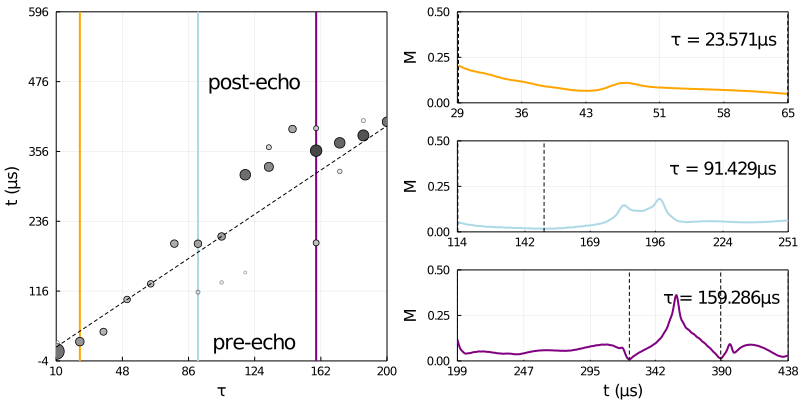

0.1142857142857143


In [34]:
dat["vars"] = [("UL90", "UR90"), "τ", "α"];

# calculate the stats
M_stats = getMstats(dat);

# set the variable to plot vs
var_key = "τ"
var_units = "μs";
subplot_idxs = [2; 7; 12]

# set the slice
dummy_idx = [5,3];
println(dat["α"][3])

# set options and make the plot
options = make_Mstats_options(dat, var_key, var_units, dummy_idx, subplot_idxs)
p = make_Mstats_plot(dat, M_stats, subplot_idxs, 1, dummy_idx, options)

display(p)